In [1]:
# Наивный O(nm) вершины на ребра. Цикл Рэма выполняентся m раз.

In [119]:
import networkx as nx
import numpy.random as rnd
import matplotlib.pyplot as plt

In [169]:
def add_edge(f_item, s_item, graph=None):
    '''Создаем ребра.
    Функция в библиотеке создает изначально
    однонорпавленную связь, которая нас
    в нашей задаче не интересует'''
    graph.add_edge(f_item, s_item)
    graph.add_edge(s_item, s_item)

Граф:


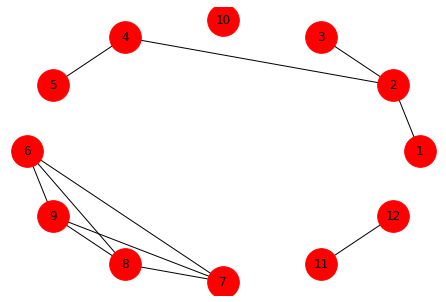

In [181]:
#Создание графа
graph = nx.Graph()

#Добавляем вершину
graph.add_node(1)
graph.add_node(2)
graph.add_node(3)
graph.add_node(10)

#Несколько ребер и вывод на экран
add_edge(1, 2, graph=graph)
add_edge(2, 3, graph=graph)
add_edge(2, 4, graph=graph)
add_edge(4, 5, graph=graph)

add_edge(6, 9, graph=graph)
add_edge(9, 8, graph=graph)
add_edge(8, 7, graph=graph)
add_edge(7, 6, graph=graph)
add_edge(6, 8, graph=graph)
add_edge(7, 9, graph=graph)

add_edge(11, 12, graph=graph)


print("Граф:")
nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)

In [183]:
def dfs(point, G, used, N):
    '''
    Обход в глубину.
    point - на какой точке стоим
    G - исследуемый граф
    used - рассмотренные вершины
    '''
    used[point-1] = N
    for neighbour in G[point]:
        if used[neighbour-1]==0:
            dfs(neighbour, G, used, N)
            
used = []
N=0
for i in range(len(graph.nodes())):
    used.append(0)
for point in graph:
    if used[point-1]==0:
        N+=1
        dfs(point, graph, used, N)
        
print("Всего компонент: ", N)
print('Вершины и номер компоненты:')
print(used)

Всего компонент:  4
Вершины и номер компоненты:
[1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 4, 4]


In [188]:
def naivn(G):
    '''
    Решение в лоб
    '''
    n = len(G)
    #Создание массива, в котором хранится некий номер компоненты
    count = []
    for i in range(n):
        count.append(i+1)

    #Определение, к какой компоненте привязана вершина
    key = True   
    while(key == True):
        key = False
        for i in range(n):
            min = count[i]
            for j in range(n):
                if G[i][j] != 0:
                    if min > G[i][j]:
                        min = G[i][j]
                        key = True
                    G[i][j] = min
                    G[j][i] = min
                        
            count[i] = min
    print("Вершины с их номером компоненты: ")
    print(count)
    return count

In [189]:
def intoGraph(mass):
    '''
    Перенос массива смежностей в объект nx.Graph
    Вывод его на экран и сохранение в return
    '''
    n = len(mass)
    Graph = nx.Graph()
    for i in range(n):
        Graph.add_node(i+1)
    for i in range(n):
        for j in range(n):
            if(mass[i][j]!=0):
                Graph.add_edge(i+1,j+1,graph=Graph)
    #Вывод на экрна
    nx.draw_circular(Graph,
                     node_color='red',
                     node_size=1000,
                     with_labels=True)
    return Graph

Вершины с их номером компоненты: 
[1, 1, 1, 1, 1, 6, 6, 6]


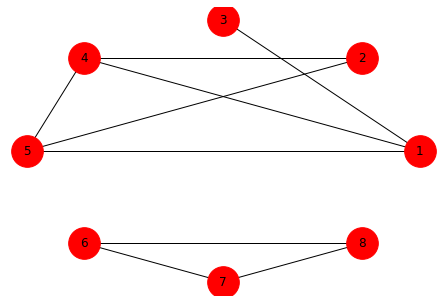

In [190]:
mass = [[1, 0, 3, 4, 5,0,0,0],
        [0, 2, 0, 4, 5,0,0,0],
        [1, 0, 3, 0, 0,0,0,0],
        [1, 2, 0, 4, 5,0,0,0],
        [1, 2, 0, 4, 5,0,0,0],
        [0, 0, 0, 0, 0,6,7,8],
        [0, 0, 0, 0, 0,6,7,8],
        [0, 0, 0, 0, 0,6,7,8],]

a = naivn(mass)
intoGraph(mass)

In [191]:
col = {}
def create(x):
    '''
    Создает подмножество элемента x с названием x
    '''
    col[x]=x
    
def unite(x,y):
    '''
    Объединение двух подмножеств.
    Оба удаляются и формируют объединенное.
    '''
    val = 0
    x1 = col.pop(x)
    if(type(x1)==type(val)):
        x1=[x1]
    x2 = col.pop(y)
    if(type(x2)==type(val)):
        x2=[x2]
    col[x] = x1+x2
    
    
def find(x):
    '''
    Поиск множества, к которому принадлежит x
    '''
    #print('FIND')
    Err = 0
    for i in col.items():
        if type(i[1]) != type(Err):
            for j in i[1]:
                if(j==x):
                    return i[0]
        else:
            if(i[1] == x):
                return i[0]
            
    return Err

In [192]:
def Ram(G, n):
    '''
    Реализация алгоритма Рэма
    '''
    # 1. Создаем n синглетонов
    for i in range(1,n+1):
        create(i)
    # 2. Читаем ребра
    for i,j in G: # 3,4. Поиск множеств, которые соединяем
        X1 = find(i)
        X2 = find(j)
        if(X1 != X2): # 5,6. Проверка и объединение
            unite(X1, X2)

Компонента : ее вершины
{10: 10, 1: [1, 2, 3, 4, 5], 6: [6, 9, 7, 8], 11: [11, 12]}


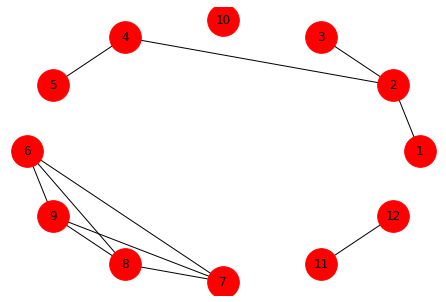

In [193]:
Ram(list(graph.edges), graph.number_of_nodes())

print("Компонента : ее вершины")
print(col)

nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)

In [194]:
def naivn_edges(G, n):
    '''
    Решение в лоб c таким же входом, как в Ram
    '''
    #Создание массива, в котором хранится некий номер компоненты
    count = []
    for i in range(n):
        count.append(i+1)

    #Определение, к какой компоненте привязана вершина
    key = True   
    while(key == True):
        key = False
        
        for i,j in G:
            if(count[i-1] != count[j-1]):
                val = min(count[i-1],count[j-1])
                if(val > count[j-1]):
                    val = count[j-1]
                if(val > count[i-1]):
                    val = count[i-1]
                count[i-1] = val
                count[j-1] = val
                key = True
                
    print("Вершины с их номером компоненты: ")
    print(count)
    return count

Вершины с их номером компоненты: 
[1, 1, 1, 1, 1, 6, 6, 6, 6, 10, 11, 11]
Граф: 


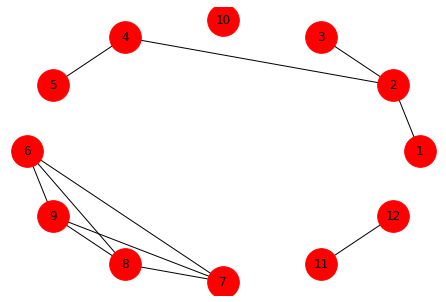

In [196]:
naivn_edges(list(graph.edges), graph.number_of_nodes())

print("Граф: ")
nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)